In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
df = pd.read_csv("dataset_hebdo_2010-2016.csv")

df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").set_index("date")
y = df["passages_urgences"].asfreq("W-SUN").ffill()

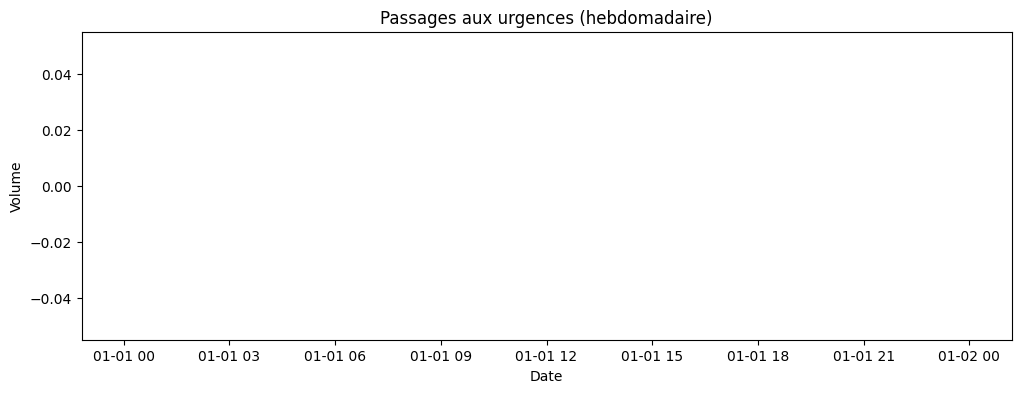

In [16]:
plt.figure(figsize=(12,4))
plt.plot(y)
plt.title("Passages aux urgences (hebdomadaire)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [17]:
result = adfuller(y)
print("ADF p-value :", result[1])

MissingDataError: exog contains inf or nans

In [ ]:
horizon = 52 
train_y = y.iloc[:-horizon]
test_y  = y.iloc[-horizon:]

In [ ]:
model = SARIMAX(
    train_y,
    order=(1,1,1),
    seasonal_order=(1,1,1,52),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result = model.fit()
print(result.summary())

In [ ]:
forecast = result.get_forecast(steps=horizon)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

In [ ]:
mae = mean_absolute_error(test_y, pred)
rmse = np.sqrt(mean_squared_error(test_y, pred))

print("MAE :", mae)
print("RMSE :", rmse)
print("AIC :", result.aic)

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train_y, label="Train (2010-2015)")
plt.plot(test_y, label="Test (2016)")
plt.plot(pred, label="Prévision SARIMA")

plt.fill_between(
    pred.index.to_pydatetime(),
    conf_int.iloc[:,0].values,
    conf_int.iloc[:,1].values,
    alpha=0.3
)

plt.title("Prévision SARIMA hebdomadaire - Urgences")
plt.xlabel("Date")
plt.ylabel("Passages")
plt.legend()
plt.show()